In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,)

In [2]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image)

In [6]:
import numpy as np

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
for i in range(100): 
    print(sgd_clf.predict(X_train[i].reshape(1,-1)), y_train_5[i])

[False] False
[False] False
[False] False
[False] False
[ True] True
[ True] True
[ True] True
[False] False
[False] False
[False] False
[False] False
[ True] True
[ True] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[ True] True
[False] False
[False] False
[False] False
[False] False
[False] False
[ True] True
[False] False
[False] False
[False] False
[ True] True
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[ True] True
[False] False
[ True] True
[False] False
[False] False
[False] False
[False] False
[False] False
[False] False
[

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9632, 0.967 , 0.9626])

In [10]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(y_train_pred)
print(confusion_matrix(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

[False False False ... False False False]
[[53712   867]
 [ 1277  4144]]
0.7944785276073619


In [12]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [13]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

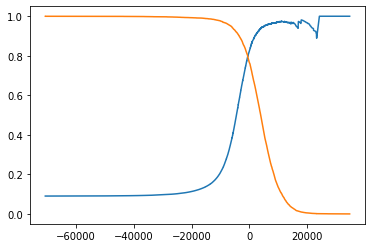

In [14]:
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.show()

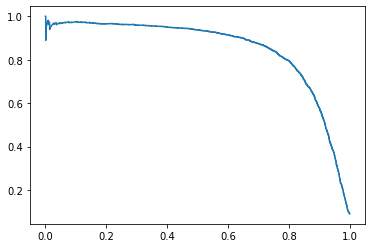

In [15]:
plt.plot(recalls, precisions)

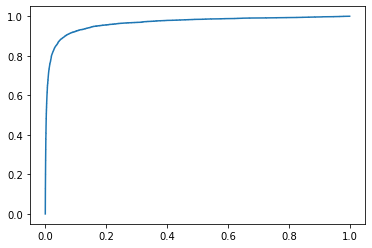

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plt.plot(fpr, tpr)

C:\Users\kushida.teppei\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kushida.teppei\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kushida.teppei\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


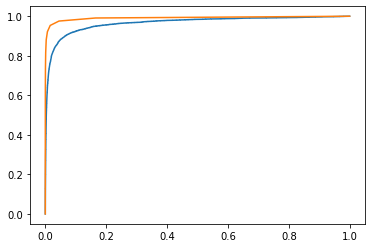

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, label='SGD')
plt.plot(fpr_forest, tpr_forest, label='RandomForest')
plt.show()

In [19]:
sgd_clf.fit(X_train, y_train)


array(['1', '5', '1', '6', '6', '0', '8', '0', '1', '7'], dtype=object)

In [23]:
forest_clf.fit(X_train, y_train)

C:\Users\kushida.teppei\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87917417, 0.87724386, 0.87698155])

In [30]:
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train)

In [31]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

C:\Users\kushida.teppei\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89292142, 0.90434522, 0.90693604])

In [33]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

C:\Users\kushida.teppei\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


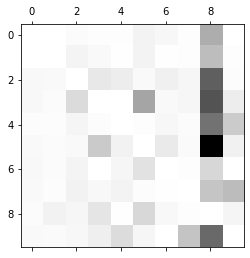

In [47]:
row_sums = conf_mx.sum(axis=1)
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap='Greys')

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

X_train = X_train[:10000]
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
y_train_mod = X_train
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
clean_digit = knn_clf.predict(X_train_mod[100].reshape(1,-1))

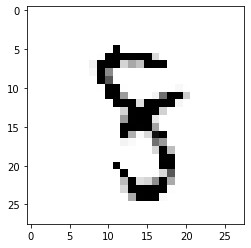

In [56]:
plt.imshow(clean_digit.reshape(28,28), cmap='Greys')

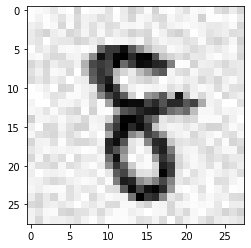

In [58]:
plt.imshow(X_train_mod[100].reshape(28,28), cmap='Greys')

In [59]:
forest_clf.fit(X_train_mod, y_train_mod)

MemoryError: could not allocate 26306674688 bytes

In [ ]:
clean_digit = forest_clf.predict(X_train_mod[100].reshape(1,-1))
plt.imshow(clean_digit.reshape(28,28), cmap='Greys')

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [10]:
X = iris['data']
y = iris['target']

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

C:\Users\kushida.teppei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kushida.teppei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

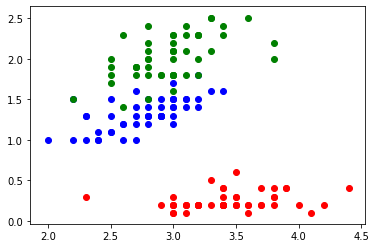

In [61]:
from matplotlib import pyplot as plt
import numpy as np

class_0 = np.where(y == 0)
class_1 = np.where(y == 1)
class_2 = np.where(y == 2)
X_class_0 = X[class_0]
X_class_1 = X[class_1]
X_class_2 = X[class_2]

feature1 = 1
feature2 = 3
plt.scatter(X_class_0[:, feature1], X_class_0[:, feature2], c='red')
plt.scatter(X_class_1[:, feature1], X_class_1[:, feature2], c='blue')
plt.scatter(X_class_2[:, feature1], X_class_2[:, feature2], c='green')
plt.show()

In [62]:
new_model = np.array([5.7, 1.7, 5.5, 1.7])
log_reg.predict(new_model.reshape(1, -1))

array([2])

In [63]:
log_reg.predict_proba(new_model.reshape(1, -1))

array([[6.31104704e-05, 4.55806478e-01, 5.44130411e-01]])

In [70]:
a = np.array([3, 5, 4])
b = np.array([True, False, True])
a[b]

array([3, 4])